In [1]:
import pandas as pd

In [28]:
import numpy as np
from numpy import set_printoptions

In [6]:
sNames = ['preg','plas','pres','skin','test','mass','pedi','age','class']

In [10]:
df = pd.read_csv('diabetes.csv',names=sNames)

In [12]:
# Obtenemos los data como array
data = df.values

In [37]:
# Dejamos fuera los nombres de las columnas
X = data[1:,0:8]
len(X)

768

In [46]:
# Dejamos fuera el nonbre de la columna class
Y= data[1:,8]
len(Y)

768

In [41]:
# Preparamos una reescalamiento de los datos entre [0-1] tecnica MinMaxScaler(.)
from sklearn.preprocessing import MinMaxScaler
Escala = MinMaxScaler(feature_range=(0,1))

In [48]:
# Calculamos la nueva escala
NewEscala = Escala.fit_transform(X)

In [43]:
set_printoptions(precision=3)

In [49]:
print(NewEscala)

[[0.353 0.744 0.59  ... 0.501 0.234 0.483]
 [0.059 0.427 0.541 ... 0.396 0.117 0.167]
 [0.471 0.92  0.525 ... 0.347 0.254 0.183]
 ...
 [0.294 0.608 0.59  ... 0.39  0.071 0.15 ]
 [0.059 0.633 0.492 ... 0.449 0.116 0.433]
 [0.059 0.467 0.574 ... 0.453 0.101 0.033]]


In [57]:
# Obtenemos otra escala -> Standarizar -> media = 0 y desv. stand = 1
from sklearn.preprocessing import StandardScaler
Escala_N = StandardScaler().fit(X)

In [59]:
NewEscala_N = Escala_N.transform(X)

In [60]:
NewEscala_N

array([[ 0.64 ,  0.848,  0.15 , ...,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161, ..., -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, ..., -1.103,  0.604, -0.106],
       ...,
       [ 0.343,  0.003,  0.15 , ..., -0.735, -0.685, -0.276],
       [-0.845,  0.16 , -0.471, ..., -0.24 , -0.371,  1.171],
       [-0.845, -0.873,  0.046, ..., -0.202, -0.474, -0.871]])

In [61]:
# Obtenemos otra escala -> Normalizacion
from sklearn.preprocessing import Normalizer
Escala_G = Normalizer().fit(X)

In [62]:
NewEscala_G = Escala_G.transform(X)

In [63]:
NewEscala_G

array([[0.034, 0.828, 0.403, ..., 0.188, 0.004, 0.28 ],
       [0.008, 0.716, 0.556, ..., 0.224, 0.003, 0.261],
       [0.04 , 0.924, 0.323, ..., 0.118, 0.003, 0.162],
       ...,
       [0.027, 0.651, 0.388, ..., 0.141, 0.001, 0.161],
       [0.007, 0.838, 0.399, ..., 0.2  , 0.002, 0.313],
       [0.008, 0.736, 0.554, ..., 0.241, 0.002, 0.182]])

In [100]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.25)

In [102]:
from sklearn.model_selection import KFold,cross_val_score

In [104]:
# Aplicamos Clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

In [105]:
nFolder = 10

In [107]:
kFold = KFold(n_splits=10)

In [108]:
model = KNeighborsClassifier()

In [109]:
res = cross_val_score(model,X,Y,cv=kFold)

In [110]:
res

array([0.636, 0.831, 0.701, 0.636, 0.714, 0.753, 0.74 , 0.805, 0.684,
       0.763])

In [111]:
res.mean()

0.7265550239234451

In [112]:
# Un 73% aprox de certeza en la clasificacion

In [113]:
# Aplicamos Clasificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [114]:
kFold = KFold(n_splits=10)

In [115]:
model = GaussianNB()

In [116]:
res = cross_val_score(model,X,Y,cv=kFold)

In [117]:
res

array([0.675, 0.805, 0.753, 0.714, 0.727, 0.766, 0.805, 0.818, 0.737,
       0.75 ])

In [118]:
res.mean()

0.7551777170198223

In [119]:
# un 76 % aprox de certeza en la clasificacion

In [120]:
# Aplicamos Clasificador Arbol Decision
from sklearn.tree import DecisionTreeClassifier

In [121]:
kFold = KFold(n_splits=10)

In [122]:
model = DecisionTreeClassifier()

In [123]:
res = cross_val_score(model,X,Y,cv=kFold)

In [124]:
res

array([0.61 , 0.779, 0.675, 0.571, 0.649, 0.74 , 0.74 , 0.805, 0.671,
       0.711])

In [125]:
res.mean()

0.6953007518796992

In [126]:
# un 69 % aprox de certeza en la clasificacion

In [132]:
#Graficando los rendimientos

In [147]:
from matplotlib import pyplot as plt

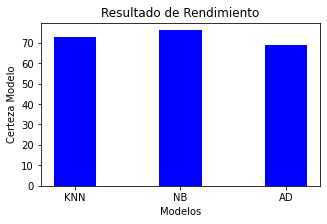

In [153]:
# Graficando el Rendimiento de los modelos
# KNN -> Vecinos mas cercanos
# NB -> Naive Bayes
# AD -> Arboles de Decision
aModelos = {'KNN':73, 'NB':76,'AD':69}
sNam = list(aModelos.keys())
sVal = list(aModelos.values())
  
fig = plt.figure(figsize = (5,3))
 
# Grafico de Barras..
plt.bar(sNam,sVal,color='blue',width = 0.4)
plt.xlabel("Modelos")
plt.ylabel("Certeza Modelo")
plt.title("Resultado de Rendimiento")
plt.show()

In [149]:
# El mejor resultado lo obtuvo Naive Bayes con este setdata de diabetes.csv